# Codigo de la figura 2.12: Espigas(arriba) y potencial suavizado (abajo) por convolución con un núcleo Gaussiano



# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# 1. Variables de entorno

- `dt`: Paso de tiempo en la simulación.
- `t_max`: Tiempo total de simulación.

## Generación de Espigas (Impulsos de Acción)
- `spike_times`: Generación de tiempos aleatorios para las espigas.
- `spikes`: Inicialización de un array para representar las espigas en el tiempo.
- `spike_indices`: Índices de los tiempos de espigas en el array temporal.
- `spikes[spike_indices]`: Marcado de los lugares de las espigas en el array temporal.

## Núcleo Gaussiano para la Convolución
- `sigma = 0.7`: Desviación estándar del núcleo gaussiano para la segunda imagen.
- `sigma2 = 0.35`: Desviación estándar del núcleo gaussiano para la primera imagen.

In [2]:
dt = 0.1
t_max = 10
spike_times = np.random.uniform(0, t_max, size=20)
spikes = np.zeros(int(t_max / dt))
spike_indices = (spike_times / dt).astype(int)
spikes[spike_indices] = 1
sigma = 0.7
sigma2 = 0.35

# 2. Creación y Convolución de Núcleos Gaussianos

- `gaussian_kernel`: Creación del núcleo gaussiano con desviación estándar `sigma`.
- `gaussian_kernel2`: Creación de otro núcleo gaussiano con desviación estándar `sigma2`.

## Convolución de las Espigas con el Núcleo Gaussiano
- `smoothed_spikes`: Convolución de las espigas con el núcleo gaussiano y ajuste del paso de tiempo.
- `smoothed_spikes2`: Convolución de las espigas con el otro núcleo gaussiano y ajuste del paso de tiempo.

In [3]:
gaussian_kernel = np.exp(-0.5 * ((np.arange(-5 * sigma, 5 * sigma, dt)) / sigma) ** 2)
gaussian_kernel2 = np.exp(-0.5 * ((np.arange(-5 * sigma2, 5 * sigma2, dt)) / sigma2) ** 2)
smoothed_spikes = convolve(spikes, gaussian_kernel, mode='same') * dt
smoothed_spikes2 = convolve(spikes, gaussian_kernel2, mode='same') * dt

# 3. Visualización de las Espigas y la Convolución con Núcleos Gaussianos

## Subplot 1:
- Representación de las espigas en el tiempo.

## Subplot 2:
- Gráfico de la convolución de las espigas con un núcleo gaussiano (Desviación estándar = 0.35).

## Subplot 3:
- Gráfico de la convolución de las espigas con otro núcleo gaussiano (Desviación estándar = 0.7).


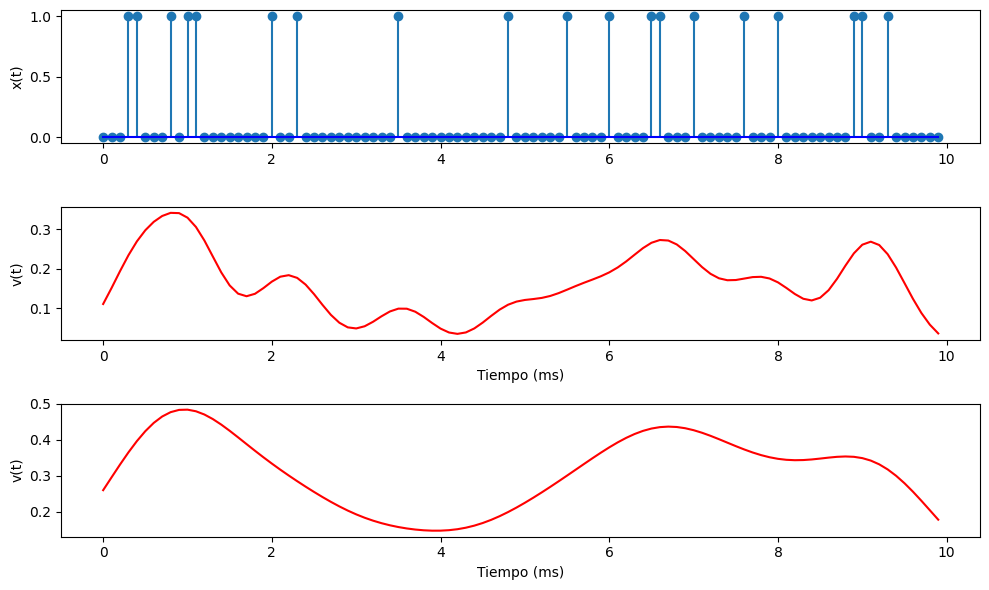

In [4]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.stem(np.arange(0, t_max, dt), spikes, basefmt="b", use_line_collection=True)
plt.ylabel('x(t)')

plt.subplot(3, 1, 2)
plt.plot(np.arange(0, t_max, dt), smoothed_spikes2, 'r')
plt.xlabel('Tiempo (ms)')
plt.ylabel('v(t)')

plt.subplot(3, 1, 3)
plt.plot(np.arange(0, t_max, dt), smoothed_spikes, 'r')
plt.xlabel('Tiempo (ms)')
plt.ylabel('v(t)')


plt.tight_layout()
plt.show()